
![](CoverImage.jpg)





### Inhalt der Vorlesung:

    1. Vorkurs
            - Mathematische Vorbereitung 
            - Python
    2. Einführung
            - Motivation Demo: Wozu Signalverarbeitung?  
            - Grundbegriffe der Signalverarbeitung
            - Anwendungsbeispiele
            - lineare, zeitinvariante Übertragungssysteme (LZI)
            - Klassifizierung von Signalen 
            - Impulsantwort
    3. Zeitdiskrete Signale
            - Faltung von Signalen; 
            - Diskrete Fourier-Transformation (DFT)
            - Signalabtastung; Abtasttheorem und Aliasing; Leakage-Effekt, 
            - Fast Fourier Transformation (FFT)
            - Frequenzanalyse mittels DFT
    4. Filter
            - nicht-rekursive und rekursive digitale Filter, 
            - FIR- und IIR-Systeme; 
            - Filteranalyse; Filtersynthese
    5.  Stochastische Signale 
            - Grundbegriffe der Wahrscheinlichkeitsrechnung
            - Erwartungswert, Momente und Varianz
            - Korrelation
    6. Spektrogramm (?)
    7. Deep Learning für Signalverarbeitung (?)

Text(0.5, 0, 'Frequency index (k)')

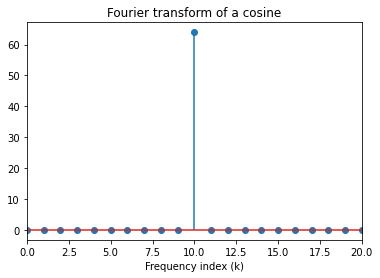

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft
k0=4; N=128; n=np.arange(N); k=np.arange(N)
x=np.sin(5*np.pi*k0*n/N)
X=fft(x)
plt.stem(k,np.abs(X))
plt.xlim([0, 20])
plt.title("Fourier transform of a cosine")
plt.xlabel("Frequency index (k)")

# Setup

In [5]:
import numpy as np
import pandas as pd # panda to work with data
import matplotlib.pyplot as plt # to plot charts & signals
import seaborn as sns # make charts prettier
sns.set(style="darkgrid")

### Die Vorlesung Inhalt in einem Demo:

* The sound is an analog signal that humans perceive through sensory organs
* First step: it should be converted from analoge to digital in two steps:
    * Sampling
    * Quantization
    

The whole process of speech recognition consist of:
* The capture of speech
* Transforming audio frequencies to make it machine-ready. (data pre-processing)
* Natural Language Processing to understand the content of speech
* Synthesis of the recognized words to help the machine speak a similar dialect

#![](Demo.jpg)

### Step1: Reading a file for ausio signals

SciPy has many methods of performing file operation in Python
* Recording the audio signal
* Sampling

In [7]:
import numpy as np
# Using IO module to read Audio Files
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("Welcome.wav")
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


FileNotFoundError: [Errno 2] No such file or directory: 'Welcome.wav'

In [7]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)

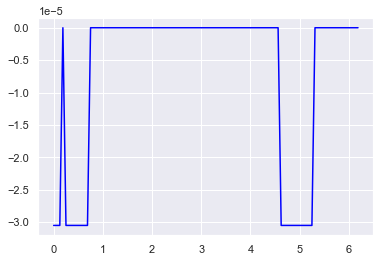

In [8]:
plt.plot(time_axis, pow_audio_signal, color='blue')

This is the representation of the sound amplitude of the input file against its duration of play. We have successfully extracted numerical data from an audio (.wav) file.

### Step 2: Transforming Audio Frequencies
https://towardsdatascience.com/a-step-by-step-guide-to-speech-recognition-and-audio-signal-processing-in-python-136e37236c24

Frequency-Domain Representation: To better understand an audio signal, it is necessary to look at it through a frequency domain. This representation of an audio signal will give us details about the presence of different frequencies in the signal. Fourier Transform is a mathematical concept that can be used in the conversion of a continuous signal from its original time-domain state to a frequency-domain state. We will be using Fourier Transforms (FT) in Python to convert audio signals to a frequency-centric representation.


**Fourier Transforms in Python:** Fourier Transforms is a mathematical concept that can decompose this signal and bring out the individual frequencies. This is vital for understanding all the frequencies that are combined together to form the sound we hear. Fourier Transform (FT) gives all the frequencies present in the signal and also shows the magnitude of each frequency.

All audio signals are composed of a collection of many single-frequency sound waves that travel together and create a disturbance in the medium of movement, for instance, a room. Capturing sound is essentially the capturing of the amplitudes that these waves generated in space.

C:\Users\Seyed Eghbal Ghobadi\AppData\Local\Temp\ipykernel_20072\596709417.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)


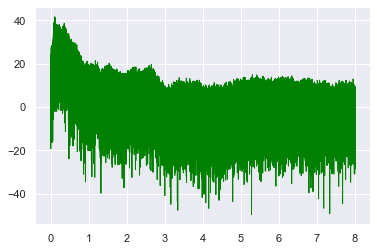

In [9]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
  signal_freq[1:transform_len] *= 2
else:
  signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)

With this, we were able to apply Fourier Transforms to the Audio input file and subsequently see a frequency domain (frequency against signal strength) representation of the audio.

### Step 3: Extracting features from speech

Once the speech is moved from a time-domain signal to a frequency domain signal, the next step is to convert this frequency domain data into a usable feature vector. Before starting this, we have to know about a new concept called **MFCC**.

[Online Tone Generator](https://www.szynalski.com/tone-generator/)

In [12]:
from python_speech_features import mfcc, logfbank
sampling_freq, sig_audio = wavfile.read("Welcome.wav")

C:\Users\Seyed Eghbal Ghobadi\AppData\Local\Temp\ipykernel_12604\3156604333.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, sig_audio = wavfile.read("Welcome.wav")


In [13]:
# We will now be taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]

In [14]:
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


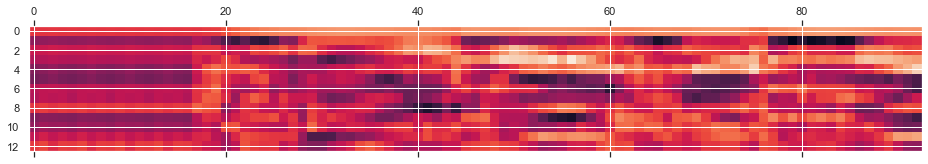

In [15]:
mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)

The first horizontal yellow lines below every segment are the fundamental frequency and at their strongest. Above the yellow line are the harmonics that share the same frequency distance between them. | Image by Author

In [16]:
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])


Filter bank
Window Count = 93
Individual Feature Length = 26


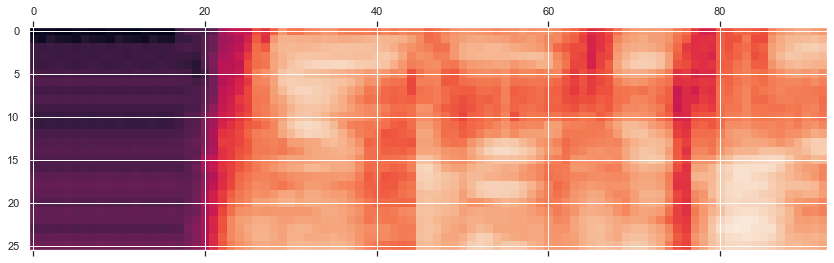

In [17]:
fb_feat = fb_feat.T
plt.matshow(fb_feat)

If we see the two distributions, it is evident that the low frequency and high-frequency sound distributions are separated in the second image.

### Step 4: Recognizing Spoken Words

Speech Recognition is the process of understanding the human voice and transcribing it to text in the machine. There are several libraries available to process speech to text, namely, Bing Speech, Google Speech, Houndify, IBM Speech to Text, etc. We will be using the Google Speech library to convert Speech to Text.

Google Speech API
More about the Google Speech API can be read from the Google Cloud Page and the Speech Recognition PyPi page. A few key features that the Google Speech API is capable of are the adaptation of speech. This means that the API understands the domain of the speech. For instance, currencies, addresses, years are all prescribed into the speech-to-text conversion. There are domain-specific classes defined in the algorithm that recognize these occurrences in the input speech. The API works with both on-prem, pre-recorded files as well as live recordings on the microphone in the present working environment. We will analyze live speech through microphonic input in the next section.

In [10]:
import speech_recognition as speech_recog
# Creating a recording object to store input
rec = speech_recog.Recognizer()

In [11]:
# Importing the microphone class to check availabiity of microphones
mic_test = speech_recog.Microphone()

In [12]:
# List the available microphones
speech_recog.Microphone.list_microphone_names()

['Microsoft Sound Mapper - Input',
 'Mikrofon (2- HD Pro Webcam C920',
 'Microphone Array (Intel® Smart ',
 'Microsoft Sound Mapper - Output',
 'Speakers (Intel® Smart Sound Te',
 'Primärer Soundaufnahmetreiber',
 'Mikrofon (2- HD Pro Webcam C920)',
 'Microphone Array (Intel® Smart Sound Technologie für MPI SoundWire® Audio)',
 'Primärer Soundtreiber',
 'Speakers (Intel® Smart Sound Technologie für MPI SoundWire® Audio)',
 'Speakers (Intel® Smart Sound Technologie für MPI SoundWire® Audio)',
 'Microphone Array (Intel® Smart Sound Technologie für MPI SoundWire® Audio)',
 'Mikrofon (2- HD Pro Webcam C920)',
 'Mikrofon ()',
 'Mikrofonarray ()',
 'Output ()',
 'Output 1 ()',
 'Output 2 ()',
 'Input ()',
 'Mikrofon (HD Pro Webcam C920)']

In [13]:
# We will now directly use the microphone module to capture voice input. Specifying the second microphone to be used for a duration of 3 seconds. The algorithm will also adjust given input and clear it of any ambient noise
with speech_recog.Microphone(device_index=1) as source: 
    rec.adjust_for_ambient_noise(source, duration=3)
    print("Reach the Microphone and say something!")
    audio = rec.listen(source)
 

Reach the Microphone and say something!


In [14]:
audio

In [15]:
# Use the recognize function to transcribe spoken words to text
try:
    print("I think you said: \n" + rec.recognize_google(audio))
except Exception as e:
    print(e)

I think you said: 
hello this is signal processing lecturer welcome to the lecture


In [27]:
import pyaudio
import wave
 
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print ("recording...")

frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...
finished recording


#### Playing the recorded signal

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline

Fs, data = read("file.wav")
data=data[:,0]
Audio(data, rate = Fs)





In [29]:
import numpy as np
# Using IO module to read Audio Files
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("Welcome.wav")

C:\Users\Seyed Eghbal Ghobadi\AppData\Local\Temp\ipykernel_12604\382710554.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("Welcome.wav")


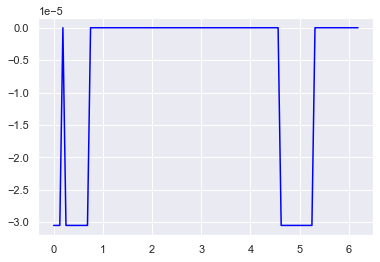

In [30]:
plt.plot(time_axis, pow_audio_signal, color='blue')

# II1003– Digitale Signalverarbeitung
## Inhalt:
### Kapitel 1: Einführung
### Kapitel 2: xxx
### Kapitel 3: xxx


# Kapitel 1: Einführung
## 1.1 Wozu Signalverarbeitung?
## 1.2 Deterministische und stochastische Signale
## 1.3 Analoge versus digitale Signale
## 1.4 A/D- und D/A-Wandler
## 1.5 Anwendungsbeispiele
![](Chapter1_Cover.jpg)




# Was ist ein Signal?
Ein <span style='color:blue'> **Signal** <span style='color:black'>ist eine <span style='color:blue'>**Funktion** <span style='color:black'> einer oder mehrerer unabhängiger <span style='color:blue'> **Größen**, <span style='color:black'> die bestimmte <span style='color:blue'> **Informationen** <span style='color:black'> beinhalten.: <span style='color:blue'>        **$f(x,y,z,t)$**

* Signale übertragen Informationen:
    * Temperatur
    * Druck
    * elektrische Spannung
    * Sprache & Musik
    * Bilder & Videos
    * EKG
    * Aktien Kursverlauf
    *...
![](Chapter1_SignalExamples.jpg)
    
* Signale sind Funktionen, meist der Zeit.
* Signale werden mit Sensoren gemessen und können in beliebiger physikalischer Form vorkommen: Druck, Temperatir, elektrische Spannung, etc.

### Signal Gen. in Python

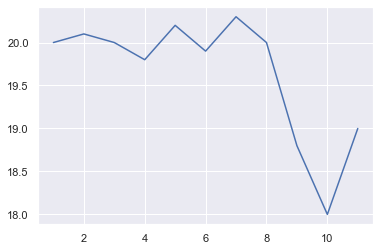

In [9]:
Zeit = [1,2,3,4,5,6,7,8,9,10,11]
Temp = [20, 20.1, 20, 19.8, 20.2, 19.9, 20.3, 20, 18.8, 18, 19]
plt.plot(Zeit, Temp)


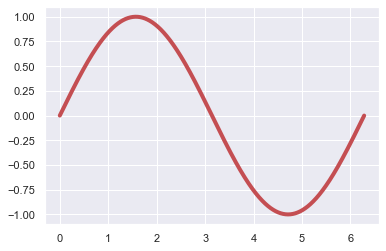

In [4]:
import numpy as np
import pandas as pd # panda to work with data
import matplotlib.pyplot as plt # to plot charts & signals
import seaborn as sns # make charts prettier
sns.set(style="darkgrid")
n_samples = 1000
input_range = np.linspace(0, 2*np.pi, n_samples, dtype=np.float64)
signal = np.sin(input_range)
plt.plot(input_range, signal, 'r-', linewidth = 4)

### Audio Beispiel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline

In [9]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)
sampFreq, data = read('b2.wav')



In [10]:
sampFreq

22050

In [11]:
data

array([128, 128, 128, ..., 128, 128, 128], dtype=uint8)

In [12]:
Audio(data, rate=sampFreq)

In [14]:
data.size

110260

Text(0.5, 1.0, 'Waveform of Test Audio Signal')

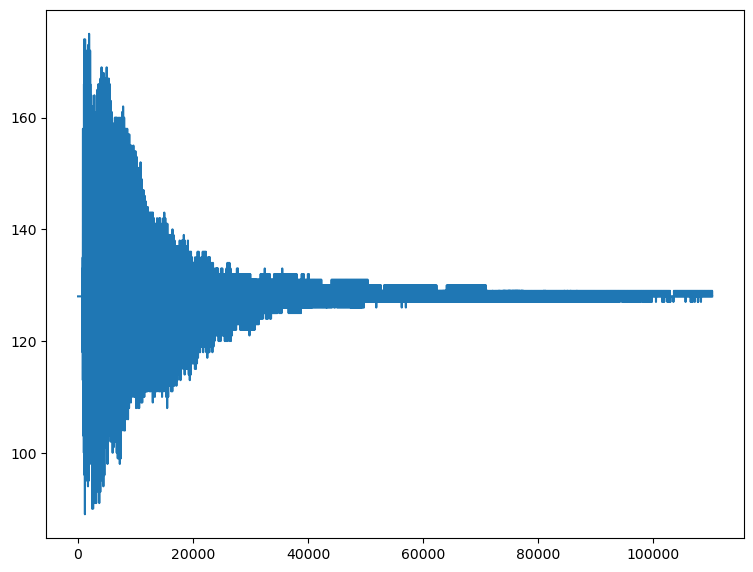

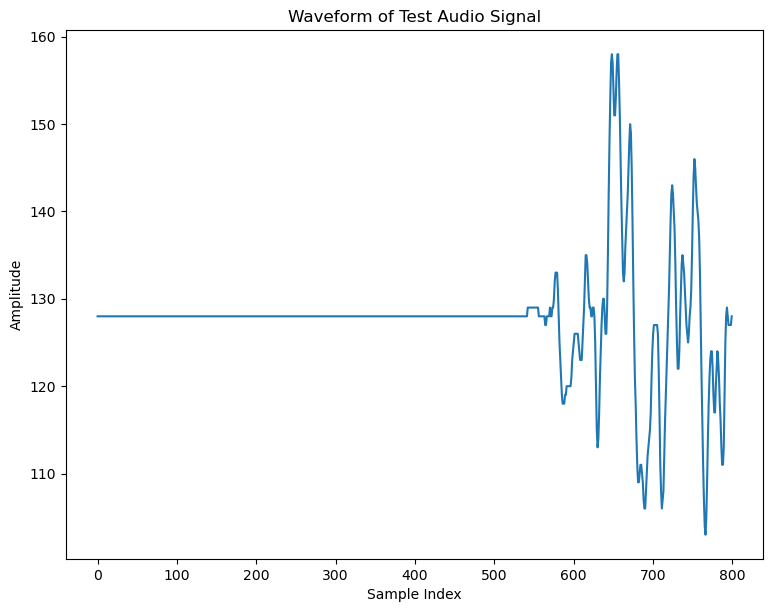

In [18]:
plt.figure()
plt.plot(data)
plt.figure()
plt.plot(data[200:1000])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio Signal')

In [54]:
import pyaudio

In [ ]:
Fs, data = read()

###### • Signale übertragen Informationen. 
###### • Signale sind Funktionen, meist der Zeit. 
###### • Signale werden mit Sensoren gemessen und können in beliebiger physikalischer Form vorkommen: Druck, Temperatur, elektrische Spannung, …

In [8]:
print("DSV macht spaß!")

DSV macht spaß!


# DSV Kapitel #1
## Einführung
was ist ein Signal?


1.  Analoge Signale
2. Digitale Signale

Eine Liste finden Sie [hier](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

Inline Code `print(100)`

hier is ein Bild von einer Signal: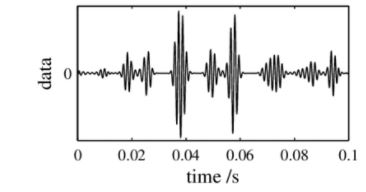



## Einführung

what is a signal?

In [3]:
import numpy as np
def square(x):
    return x*x

x = np.random.randint(1,10)
y=square(x)
print('%d squared is %d:' %(x,y))



9 squared is 81:


In [5]:
import matplotlib.pyplot as plt

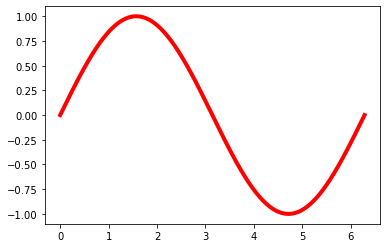

In [8]:
n_samples = 1000
input_range = np.linspace(0, 2*np.pi, n_samples, dtype=np.float64)
signal = np.sin(input_range)
plt.plot(input_range, signal, 'r-', linewidth = 4)

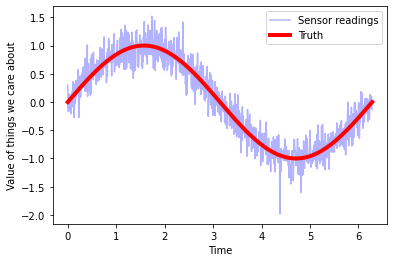

In [14]:
noise = np.random.normal(0,1,n_samples)
assert noise.shape == input_range.shape
noisy_signal = signal + noise/5
plt.plot(input_range, noisy_signal, 'b', alpha = 0.3)
plt.plot(input_range, signal, 'r-', linewidth = 4)

plt.legend(['Sensor readings','Truth'])
plt.xlabel('Time')
plt.ylabel('Value of things we care about')
plt.show()